### Data Analysis report:

# The motion of intermediate-mass black holes

### prepared by: osama yaghi, daniel conde, yash kumar
20/7/2020


## introduction:

Simulations of systems of a large number of stars including one black were analyzed. There were multiple simulations with black hole of a different mass in each of them. The center of mass was calculated in each of them. The black hole was subsequently identified. The evolution of its position and the properties of the system were studied.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import *
import os
e=0.0000000000000001 # number for float comparison
def dist(x1,y1,z1,x0,y0,z0):
    dis=float((x1-x0)**2+(y1-y0)**2+(z1-z0))**2
    dis=np.sqrt(dis)
    return dis
%precision 4

'%.4f'

## accessing the data

The data exists on a virtual machine in several folders, each representing a simulation. Each txt file represent a snapshot of the simulation at a specific time. the files were read into pandas as a csv files.
the data had several columns representing the x,y,z components of the position and the speed of each object, in addition to the mass of the object. each row represents one object.


| object| x | y | z | vx | vy | vz | m |
|-------|---|---|---|----|----|----|---|
| 1 |1.3706071|       1.0263990|     -0.91972077|     -0.19061694 |     0.50579775E-01| -0.31133180E-01 | 0.62500003E-04|

To make the code more organized, all the data files were stored in a panda array(size of the files is not large). Additional columns were add to files that represent the mass*x,y,z positions to allow calculating the center of mass.

In [4]:
#accessing the data
folders=[2,5,5,4,4,2,1] # usfull for folders naming (the numbers after 2)
count=0
sims=[]
simsNames=[]
for i in range(6): # choose which folders to access
    for j in range(1,folders[i]):
        sim='bh' # folder name
        if(i<2): # create leading zeros
            sim+='0'
        if(i==0):
            sim+='0'
        sim+=str(i*50)
        sim+='w0'
        sim+=str(j*2)
        simsNames.append(sim)
        
        os.chdir("/data/IMBH_wobble/"+sim)
        sims.append([])
        for t in range(11):
            name="c_" # file name
            if(t<10): 
                name+='0'
            if(t==0):
                name+='00'
            name+=str(100*t)
            name+=".dat"
            data=pd.read_csv(name,sep='\s+',skiprows=1)
            data.columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'm','n']
            data['cmx']=data['x']*data['m']
            data['cmy']=data['y']*data['m']
            data['cmz']=data['z']*data['m']
            sims[count].append(data)
        #fig.savefig('%s.png'%sim)
        %cd ..
        count+=1

/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble
/data/IMBH_wobble


In [5]:
Nsims = len(simsNames)   # this should be adjusted, of course
t = [i*100 for i in range(11)]

## The center of mass of the system:

The position of the center of mass was calculated at each time. it is need since the position of the black hole would be calculated relative to it. It also gives an upper limit on the precision. The following formula was used:

$$X_{cm} =  \frac{\sum_{i=0}^N m_{i}*x_{i}}{M}$$

The coordinates of the center of mass were saved in an array to be accessed later. The evolution of the center of mass as a function of time was graphed for each simulation.

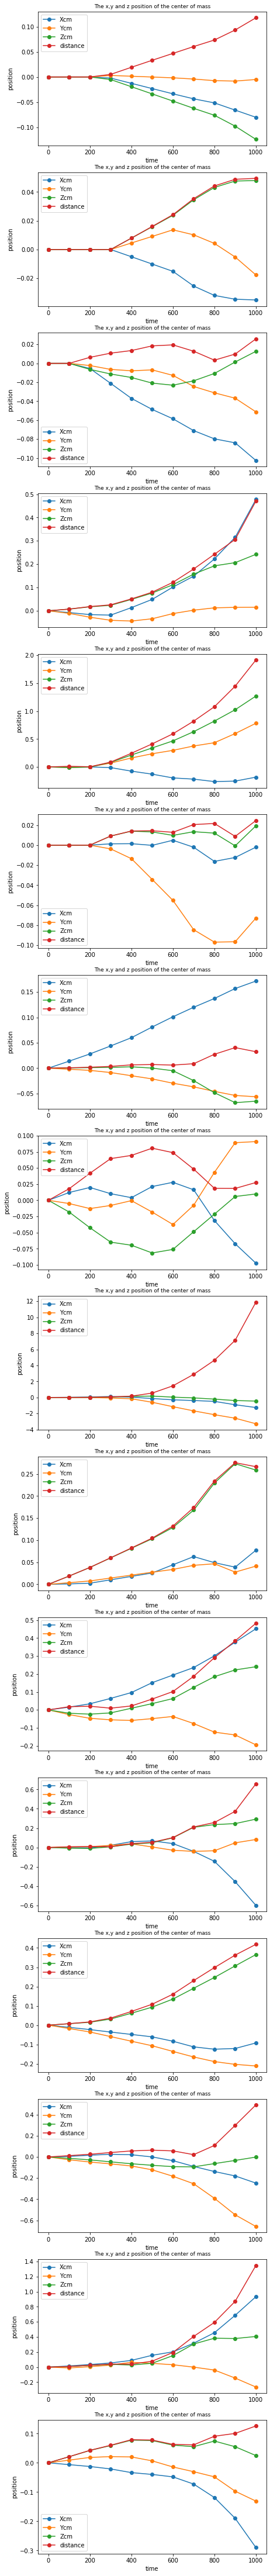

In [6]:
# the evolution of the center of mass
fig=plt.figure(figsize=(7,Nsims*5))
ax=[plt.subplot2grid((Nsims,1),(s,0)) for s in range(Nsims)]
tdat=np.zeros((Nsims,11,4))
for s in range(Nsims):
    for i in range(len(t)):
        data = sims[s][i]
        M=data['m'].sum()
        Xcm=data['cmx'].sum()/M
        Ycm=data['cmy'].sum()/M
        Zcm=data['cmz'].sum()/M
        tdat[s][i]=[Xcm, Ycm, Zcm,dist(Xcm,Ycm,Zcm,0,0,0)]
    ax[s].plot(t,tdat[s,:,:],marker='o')
    ax[s].set_xlabel('time')
    ax[s].set_ylabel('position')
    ax[s].set_title('The x,y and z position of the center of mass', fontsize=9)
    ax[s].legend(['Xcm','Ycm','Zcm','distance'])

In an Ideal simulation, the center of mass position should stay constant. However, the position here shows a deviation from zero as the time increases. This makes since because the simulation is not perfect. The deviation can provide an estimate for an lower limit on the error. 

## the evolution of the black hole position:

The black hole was identified as the most massive object in the simulation (if found). So, using the information in the 'm' column, the black hole position was recovered. It was stored in a seperate array so that it can be accessed later.
The evolution of the position of black hole relative to the center of mass was ploted for each simulation.

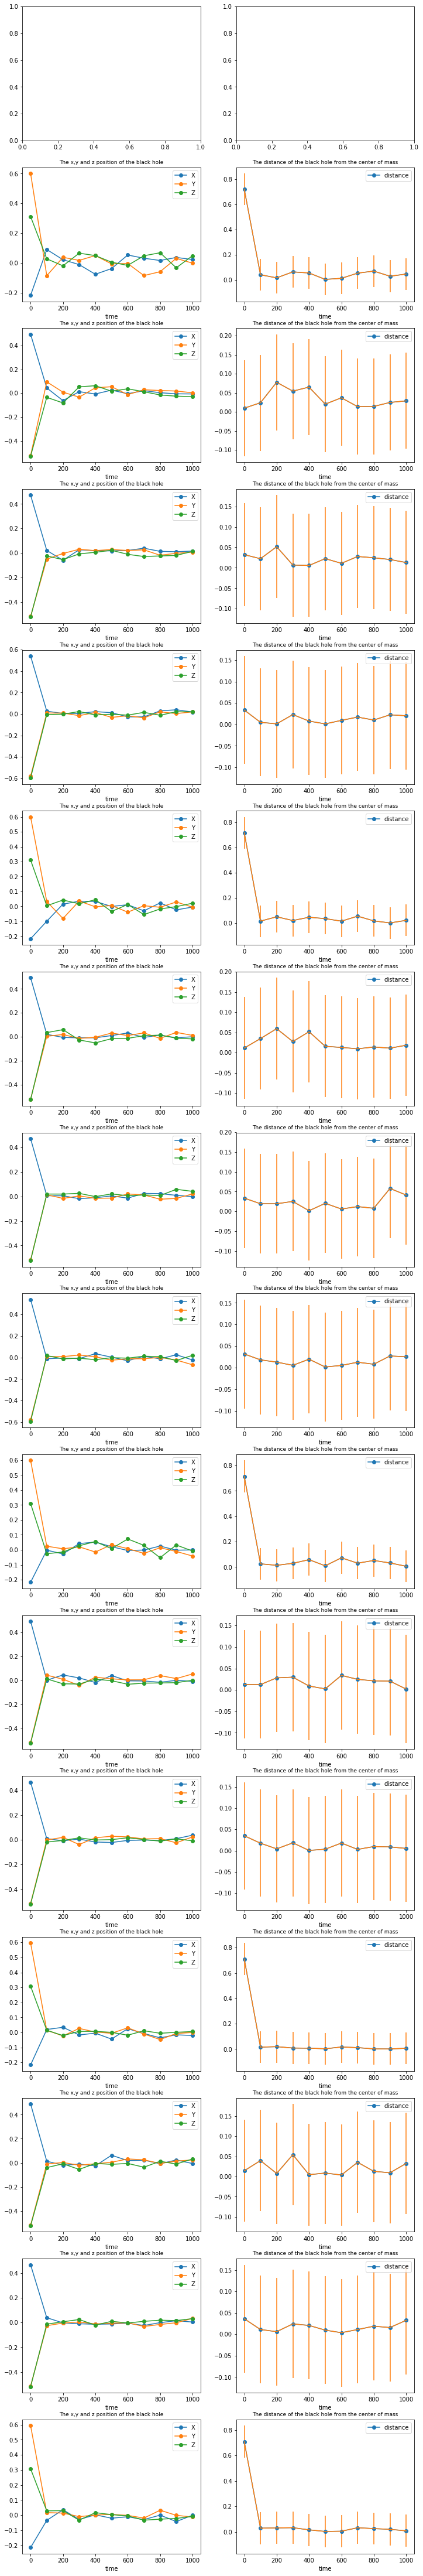

In [50]:
# the evolution of the black hole position
fig=plt.figure(figsize=(12,Nsims*5))
ax=[plt.subplot2grid((Nsims,2),(s,0)) for s in range(Nsims)]
ax2=[plt.subplot2grid((Nsims,2),(s,1)) for s in range(Nsims)]
bh=np.zeros((Nsims,11,4))
eror=np.zeros((Nsims,11))
for s in range(Nsims):
    for i in range(len(t)):
        data=sims[s][i]
        bhd=data[data['m']==data['m'].max()]# isolate the black hole data
        is_b=(float(bhd['m'].max())*len(data)-M>e) # is there a black hole
        eror[s][i]=dist(Xcm,Ycm,Zcm,0,0,0) # the error of the simulation is estimated from the changes in the center of mass
        if(is_b):
            bh[s][i][0]=bhd['x']
            bh[s][i][1]=bhd['y']
            bh[s][i][2]=bhd['z']
            bh[s][i][3]=dist(bh[s][i][0],bh[s][i][1],bh[s][i][2],tdat[s][i][0],tdat[s][i][1],tdat[s][i][2])
    if(is_b):
        ax[s].plot(t,bh[s,:,:3]-tdat[s,:,:3],marker='o')
        ax[s].set_title('The x,y and z position of the black hole', fontsize=9)
        ax[s].legend(['X','Y','Z','distance'])
        ax[s].set_xlabel('time')
        ax2[s].plot(t,bh[s,:,3],marker='o')
        ax2[s].errorbar(t,bh[s,:,3],yerr=eror[s])
        ax2[s].set_xlabel('time')
        ax2[s].set_title('The distance of the black hole from the center of mass', fontsize=9)
        ax2[s].legend(['distance'])

* The first simulation didn't contain any black holes.
* The black hole quickly moves toward the center of mass by the time of the second snapshot. The errors in the distance were taken from the deviation of the center of mass from zero.

## The distribution of black hole data:

The distribution of the black hole position for each simulation was then studied. A histogram of the distribution was ploted.

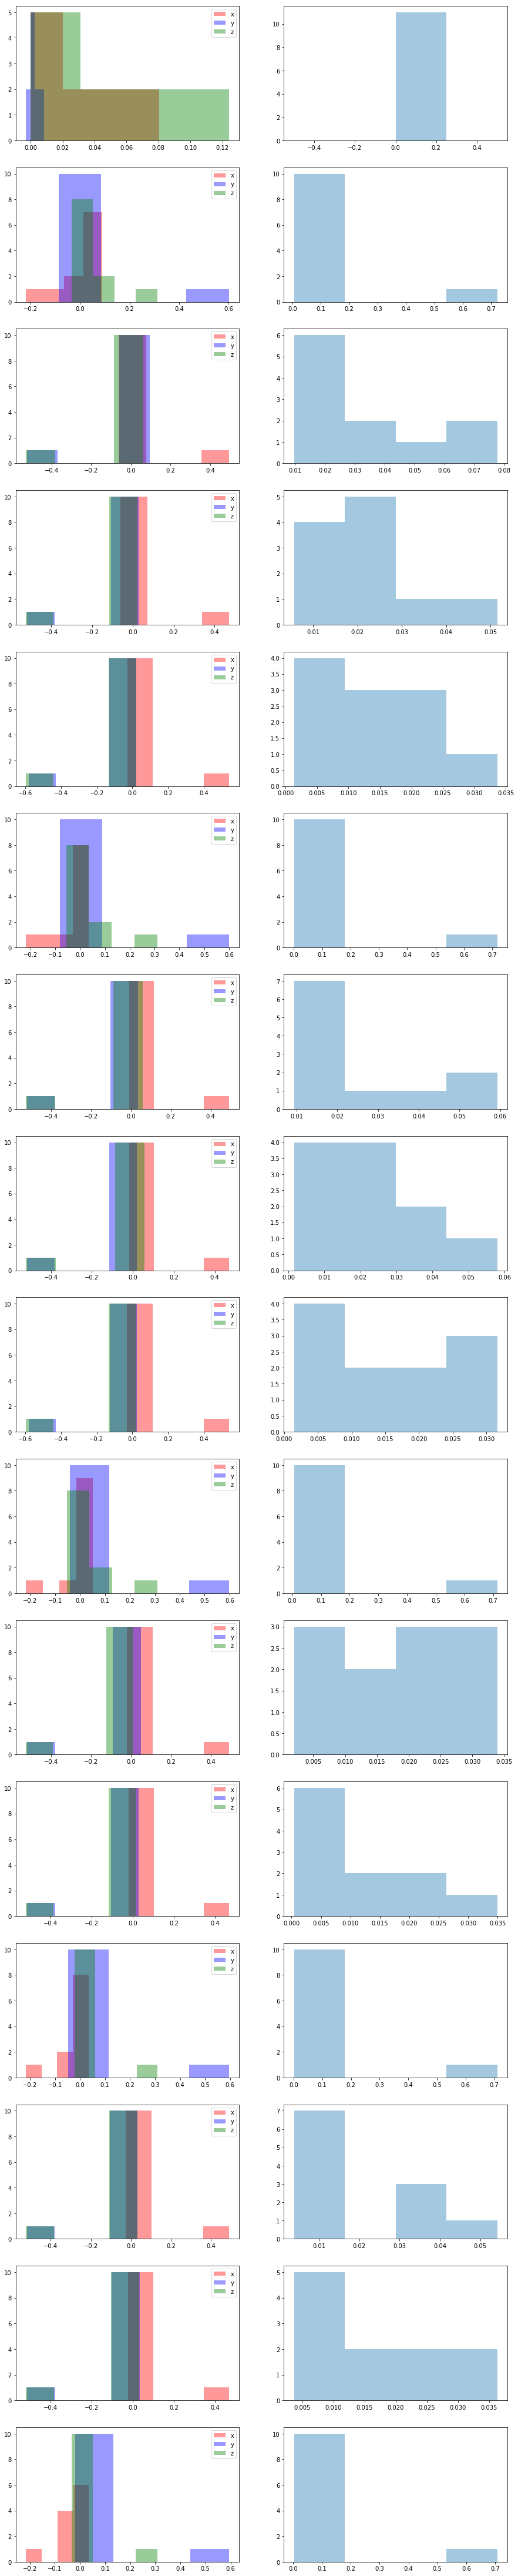

In [37]:
# histrogram for the black hole position
fig=plt.figure(figsize=(15,Nsims*5))
ax=[plt.subplot2grid((Nsims,2),(s,0)) for s in range(Nsims)]
ax2=[plt.subplot2grid((Nsims,2),(s,1)) for s in range(Nsims)]
for s in range(Nsims):
    for j in range(3):
        sns.distplot(bh[s,:,j]-tdat[s,:,j],bins=4,color ="rbg"[j], kde=False,ax=ax[s])
    ax[s].legend('xyz')
    sns.distplot(bh[s,:,3],bins=4,kde=False,ax=ax2[s])

It is clear from the distribution that most of it is around 0. However, the statistic of the data is very poor.As a result, no meaningful calculation of the standard deviation, skewness or kurtosis was possible. This is expected since the number of snapshots in each simulation is 10.
    

We can assume that the error in each bin scales as $\sqrt(n)$, where n is the number of points in each bin. If we required 10 bins with 10% error to make meaningful study of the distribution, we need at least 1000 snapshots of the simulation.
especially for times less then 100. Since by then, in all simulations, the black hole reaches the center of mass.

# the 3D position of the black hole:

Using the x,y and z components of the position of the black hole, its three-dimensional evolution was ploted.

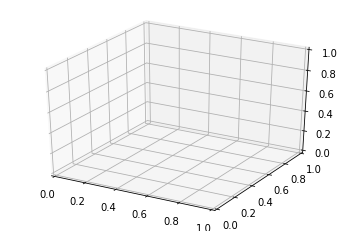

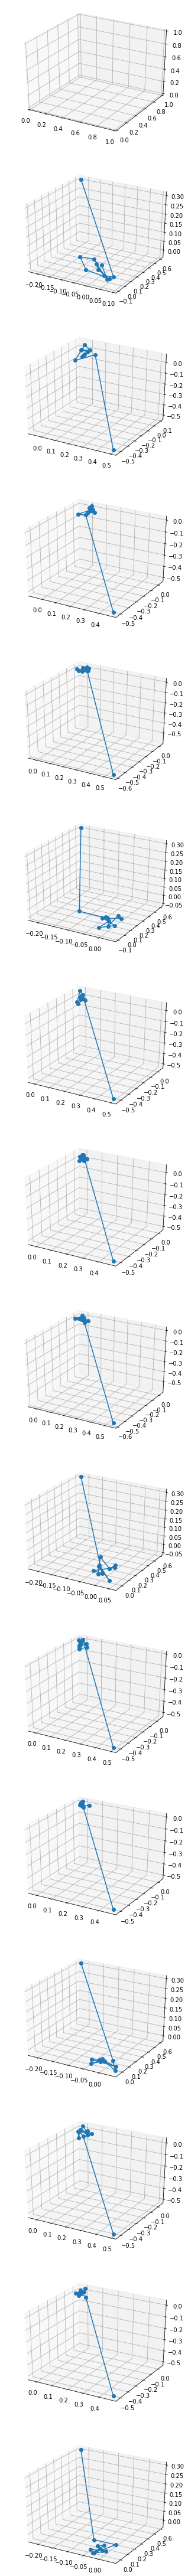

In [43]:
#3d pltoing of the position of the black hole
from mpl_toolkits import mplot3d
fig=plt.figure()
ax=plt.axes( projection='3d')
fig=plt.figure(figsize=(12,Nsims*5))
ax=[plt.subplot2grid((Nsims,2),(s,0),projection='3d') for s in range(Nsims)]
for s in range(1,Nsims):
    ax[s].plot3D(bh[s,:,0]-tdat[s,:,0],bh[s,:,1]-tdat[s,:,1],bh[s,:,2]-tdat[s,:,2],marker='o')

The positions after the first snapshot are dominated by the error of the simulation. more time snapshots before 100 can be useful to extrat the black holes motion motion.

## The evolution of the system:

The distribution of the distances of all the objects and its evolution with time was ploted. In particular, the Kernal Density Function was used to represent the distribution. It was done using displot method from seaborn.

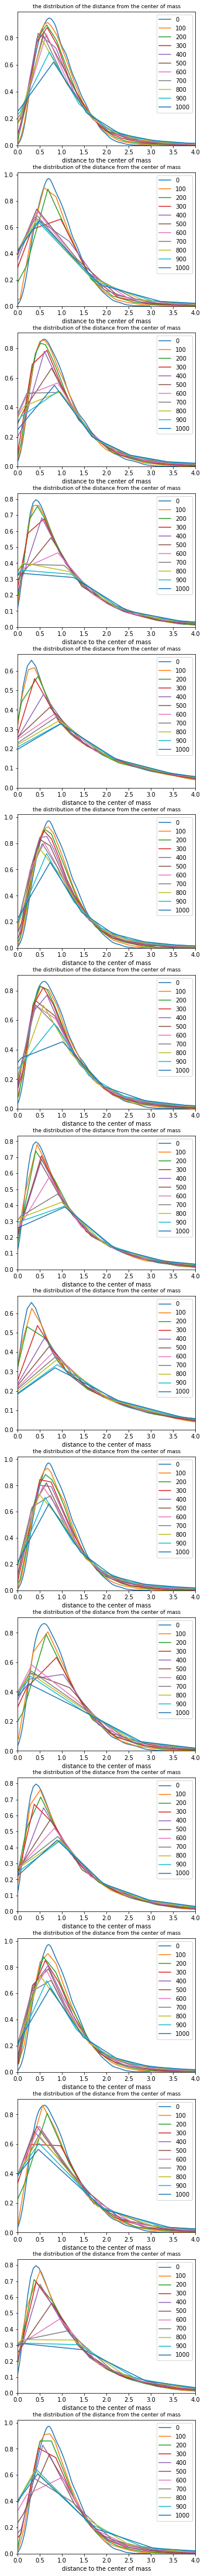

In [41]:
# the distribution and evolution of the positions of the objects.
fig=plt.figure(figsize=(12,Nsims*5))
ax1=[plt.subplot2grid((Nsims,2),(s,0)) for s in range(Nsims)]
for s in range(Nsims):
    for i in range(len(t)):
        data=sims[s][i]
        data['dist2cm']=((data['x']-tdat[s][i][0])**2+(data['y']-tdat[s][i][1])**2+(data['z']-tdat[s][i][2])**2)**(1/2)
        ax1[s].set(xlim=(0,4))
        sns.distplot(data['dist2cm'],bins=300,hist=False,ax=ax1[s],label=t[i])
        ax1[s].set_xlabel("distance to the center of mass")
        ax1[s].set_title('the distribution of the distance from the center of mass', fontsize=9)

As time increases, The distribution flattens and becomes wider.

The following code uses the numba decorator to calculate the distance to CM for each of the 1600 objects in the simulation, to ultimately visualize their behavior. Instead of using Pandas, we used lists for some of the new variables, which might be suboptimal.

In [51]:
import seaborn as sns
from numba import vectorize, int64, float64

# Using the numba decorator to avoid for loop for computing distance to CM for
#     each of the 16000 objects, and just to try it out
@vectorize([float64(float64, float64, float64, float64, float64, float64)]) 
def dist(x1,y1,z1,x0,y0,z0):
    dis=float((x1-x0)**2+(y1-y0)**2+(z1-z0))**2
    dis=np.sqrt(dis)
    return dis

Nsims = len(simsNames)   # this should be adjusted, of course
t = [i*100 for i in range(11)]

nc = int(np.ceil(len(t)/2))

# Each element in 'sims' is a simulation, which, in turn, are each an 11 element
# list with all values for each snapshot in time as a pandas DataFrame

# Each of these will have scalar data at each t for each simulation
away_meanToCM = []
particlesClose = []
particlesAway = []
flt_meanToCM = []
meanToCM = []

# portion will contain the z position and distance to CM for each 16000 object,
#     at each t, for each simulation
portion = []

# y1 will contain a 2d histogram of xy plane in ranges ((-2,2),(2,2)) at each t,
#     and for each simulation
y1 = []
print("Done!")

Done!


This loop collects the average distance to center of mass of all objects at each simulation and at each time value. It also collects their x and y coordinates in the form of a 2D histogram, to visualize as a color map, and the z coordinate as a 1d histogram.

In [52]:
for s in range(Nsims): # exploring simulations
    # Making a new list for all variables for each simulation
    away_meanToCM.append([])
    particlesClose.append([])
    particlesAway.append([])
    flt_meanToCM.append([])
    meanToCM.append([])
    portion.append([])
    y1.append([])
    for i in range(len(t)): # exploring each t
        snap = sims[s][i] # recovering data from previous cells
        data = pd.DataFrame(data = snap, columns= ['x','y','z','vx','vy','vz','m','n']) # not necessary, but I have been afraid to take it out, lol
        
        # Could totally find a way to not have to compute CM again, but this will be it :<
        # I thought to calculate this to see if objects were indeed, lumping together
        data['disToCM'] = dist(data['x'],data['y'],data['z'],tdat[s][i][0],tdat[s][i][1],tdat[s][i][2])
        data['disToOr']=((data['x'])**2+(data['y'])**2+(data['z'])**2)**(1/2)
        meanToCM[s].append(data['disToCM'].sum()/len(data['disToCM']))

        b = 100 # Could be optimized, just took it as sqrt(16000)~120~100
        others = ['x','y'] # bird's view
        y1[s].append(np.histogram2d(data[others[0]], data[others[1]],
                                    range = [[-2,2],[-2,2]], bins=b)[0]) # wish I could make this a weighed histogram taking mass into account
        
        portion[s].append([data['z'],data['disToCM'],data['disToOr']]) # should probably filter data['z'] for range -2 to 2 here instead of later
print("Done!")

Done!


Visualizing the average distance to CM of all objects at all simulations

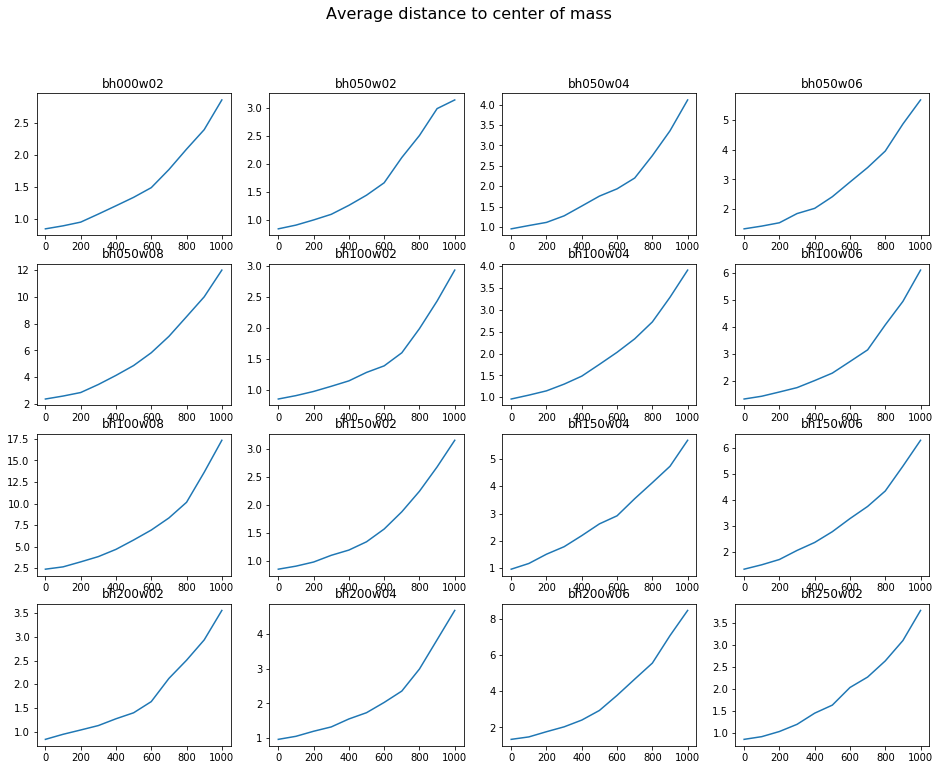

In [55]:
fig, axes = plt.subplots(Nsims//4,4,figsize= (16,12))
fig.suptitle("Average distance to center of mass", fontsize=16)
for s in range(Nsims):
    axes[(s)//4,s%4].plot(t,meanToCM[s])
    #axes[s//4,s%4].plot(t,flt_meanToCM[s])
    #axes[s//4,s%4].plot(t,away_meanToCM[s],label="hi")
    axes[(s)//4,s%4].set_title(simsNames[s])
    away_meanToCM[s]


The graphs above unmistakably show that the average distance to the center of mass among all objects increases with time. This seems counterintuitive by comparing with the graphs of the distributions we showed before, but here we have to take into account too that many objects escaped from the lumb at relatively high speeds and are very far away, increasing the value of the average of the distance to center of mass

This cell shows the initial distributions of all objects in each simulation. The following cell will produce a video, which may or may not display correctly depending on browser?

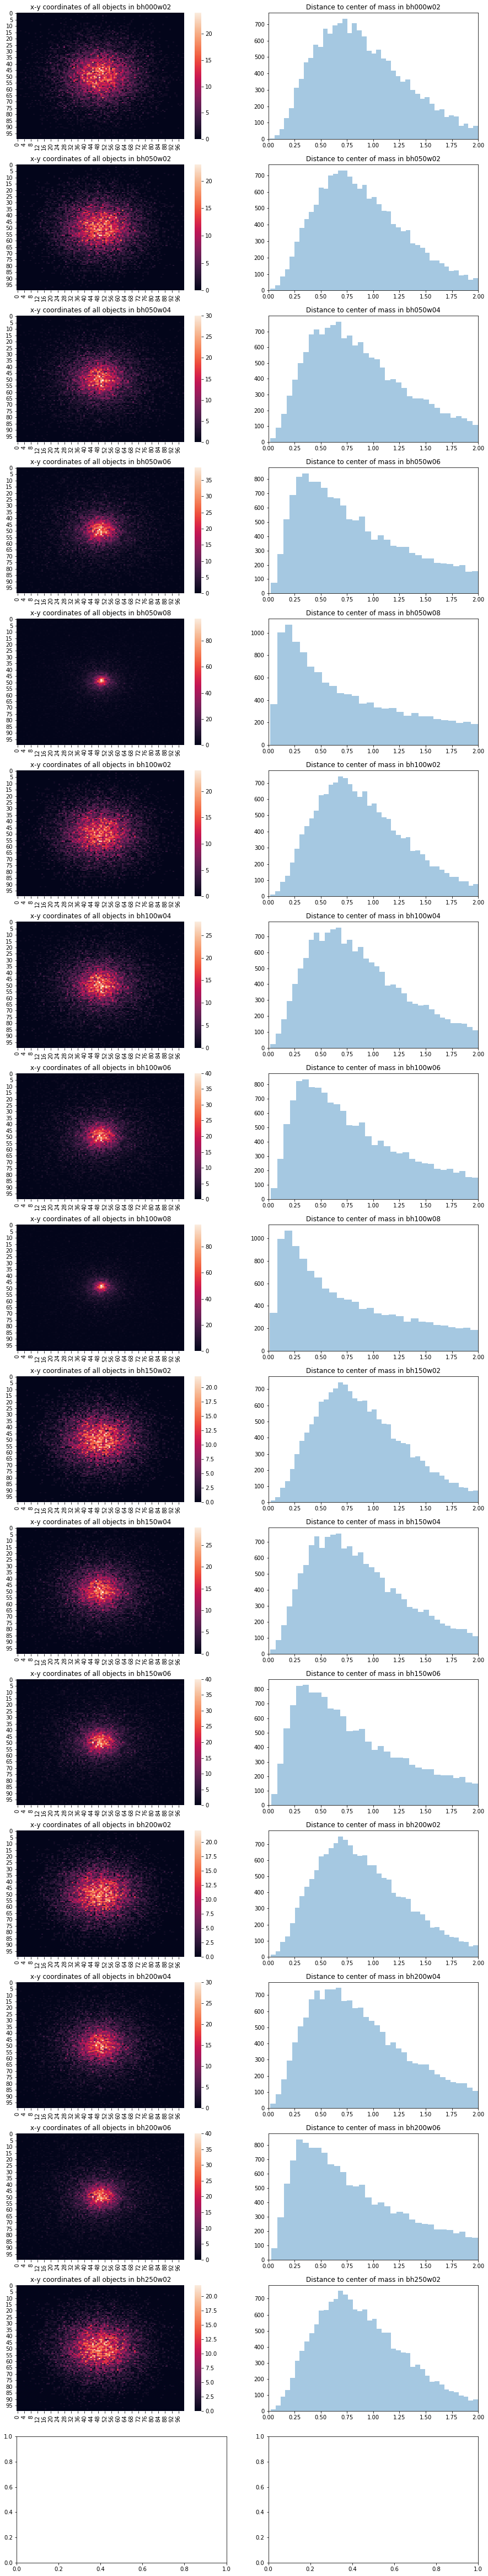

In [56]:
%matplotlib inline
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig,axes = plt.subplots(Nsims,2,figsize = (15,5*Nsims+5))

n = 100
number_of_frames = 10

data = []
for s in range(Nsims):
    data.append([])
    for i in portion[s]:
      snap = pd.DataFrame(i[2])
      data[s].append(snap[(snap >= -2.0) & (snap < 2.0)])

    heat = sns.heatmap(y1[s][0], ax = axes[0+s][0])
    hist = sns.distplot(data[s][0], kde = False, ax = axes[0+s][1], norm_hist=False)
    axes[s][1].set_xlim(0,2)
    axes[s][0].set_title("x-y coordinates of all objects in "+simsNames[s])
    axes[s][1].set_title("Distance to origin in "+simsNames[s])
        
def update_heat(num, data):
    plt.cla()
    for s in range(Nsims):
        sns.heatmap(y1[s][num],cbar=False, ax = axes[0+s][0])
        sns.distplot(data[s][num], kde = False, ax = axes[0+s][1], norm_hist=False)
        axes[s][1].set_xlim(-2,2)
        axes[s][0].set_title("x-y coordinates of all objects in "+simsNames[s])
        axes[s][1].set_title("Distance to origin in "+simsNames[s])

animation = animation.FuncAnimation(fig, update_heat, number_of_frames, fargs=(data, ) )
HTML(animation.to_html5_video())
# third column 

The following cell adds code to animate the heatmaps and histogram computed in the cells above

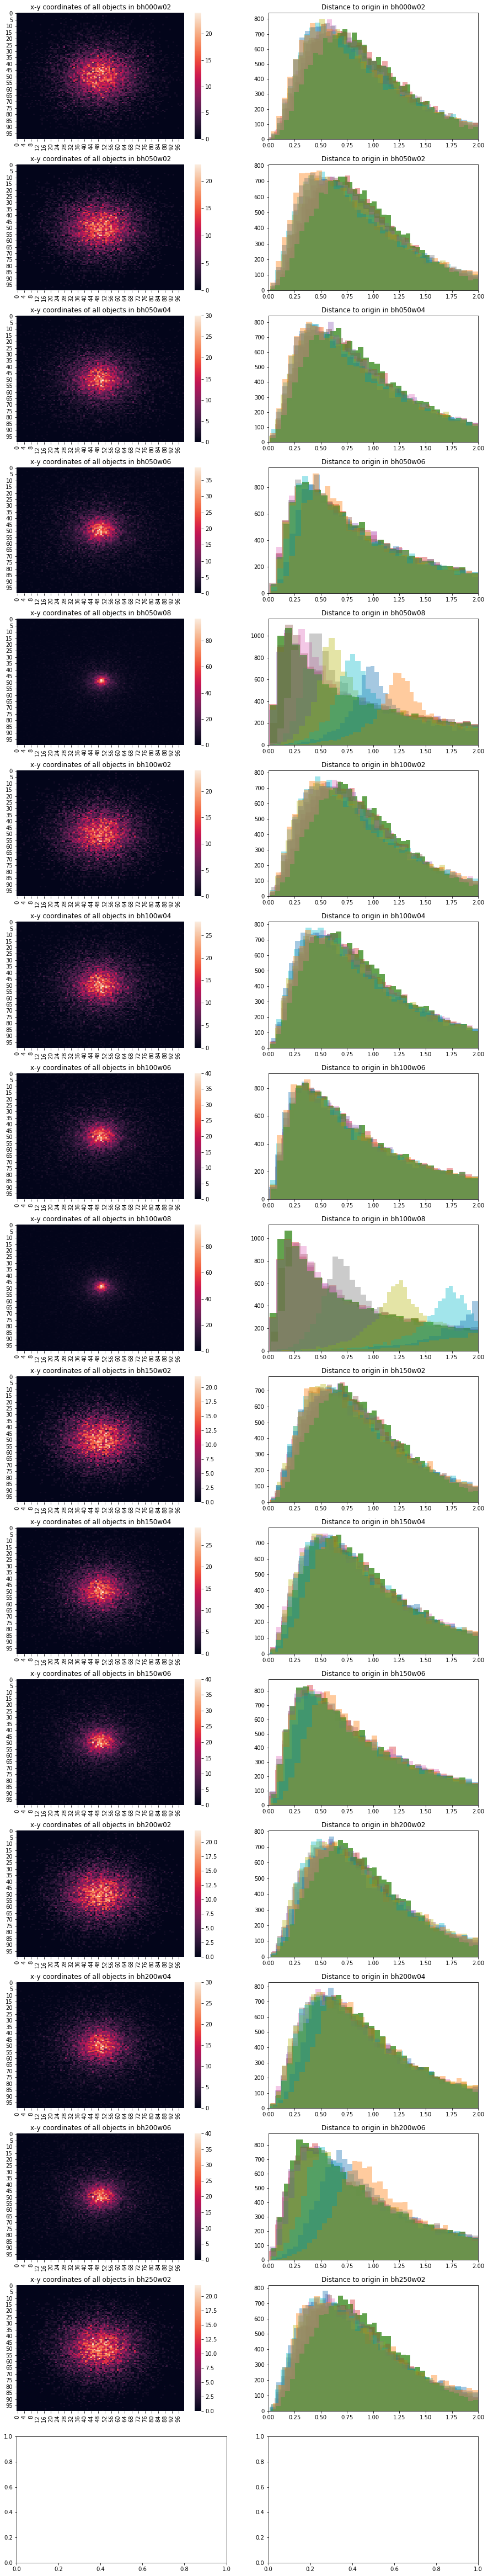

In [57]:
%matplotlib inline
from IPython.display import HTML

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig,axes = plt.subplots(Nsims+1,2,figsize = (15,5*Nsims+5))

n = 100
number_of_frames = 10

data = []
for s in range(Nsims):
    data.append([])
    for i in portion[s]:
      snap = pd.DataFrame(i[2])
      data[s].append(snap[(snap >= -2.0) & (snap < 2.0)])

    heat = sns.heatmap(y1[s][0], ax = axes[0+s][0])
    hist = sns.distplot(data[s][0], kde = False, ax = axes[0+s][1], norm_hist=False)
    axes[s][1].set_xlim(0,2)
    axes[s][0].set_title("x-y coordinates of all objects in "+simsNames[s])
    axes[s][1].set_title("Distance to origin in "+simsNames[s])
        
def update_heat(num, data):
    plt.cla()
    for s in range(Nsims):
        sns.heatmap(y1[s][num],cbar=False, ax = axes[0+s][0])
        sns.distplot(data[s][num], kde = False, ax = axes[0+s][1], norm_hist=False)
        axes[s][1].set_xlim(0,2)
        axes[s][0].set_title("x-y coordinates of all objects in "+simsNames[s])
        axes[s][1].set_title("Distance to origin in "+simsNames[s])

animation = animation.FuncAnimation(fig, update_heat, number_of_frames, fargs=(data, ) )
HTML(animation.to_html5_video())
# third column 

# Conclusion
While some information about the black holes behavior can be extracted from these simulation, more data -especially in the range of times from 0 to 100 would increase the statistics and allow for more significant study of these systems. Qualitatively, we were able to reach several conclusions: The center of mass remains near the origin for most simulations, the black hole tends to go immediately to the center, objects clump together in the center, there is a significant fraction of objects that escape, some simulations have a non-zero center of mass momentum. We used no information about the velocity components from the data files: further analysis using these could complementarily confirm or deny the conclusions we arrived to for these simulations.